# Read a WSI
Use the example from [OpenSlide Python API Tutorial](https://yuanpinz.github.io/blog/programming/2021/09/29/openslide.html).

In [1]:
import openslide

## Read the slide

In [2]:
slide_path = 'patient_004_node_4.tif'
wsi = openslide.OpenSlide(slide_path)	# read through object

## Slide properties

**level_count** refers to the number of levels in the slide.

**dimensions** is a `(width, height)` tuple for a level 0 of the slide.

**level_dimensions** is a list of `(width, height)` tuple, one for each level of the slide.

**level_downsamples** is a list of downsample factors for each level of the slide.

In [3]:
print('''
level_count: {},
dimensions: {},
level_dimensions: {},
level_downsamples: {}
'''.format(wsi.level_count,
           wsi.dimensions,
           wsi.level_dimensions,
           wsi.level_downsamples
          ))


level_count: 9,
dimensions: (96651, 197226),
level_dimensions: ((96651, 197226), (48325, 98613), (24162, 49306), (12081, 24653), (6040, 12326), (3020, 6163), (1510, 3081), (755, 1540), (377, 770)),
level_downsamples: (1.0, 2.000010346611485, 4.000082362460885, 8.00016472492177, 16.00131624262717, 32.00263248525434, 64.01045835294724, 128.04170035262752, 256.2531813014572)



## Access image data
Use `read_region(location, level, size)` method to access image data at different resolution.

**location (tuple)** – `(col, row)` tuple for top left pixel in the level 0 reference frame

**level (int)** – the level number

**size (tuple)** – `(width, height)` of the desired region

### Get lowest resolution image

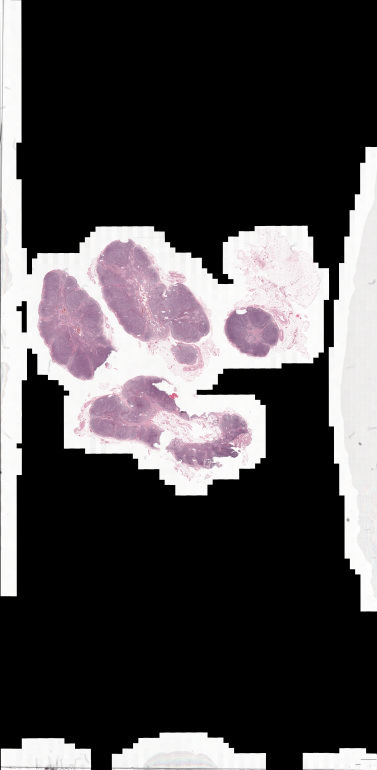

In [4]:
level = 8
wsi_region = wsi.read_region((0,0),level,wsi.level_dimensions[level])
wsi_region.show()

### Get a ROI using the bounding box from the XML file

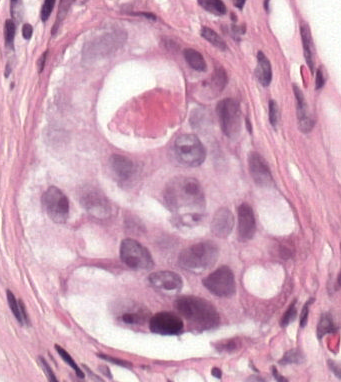

In [5]:
roi = wsi.read_region((12597,88778),0,(341,382))
roi.show()

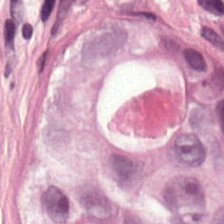

In [10]:
train_cancer = wsi.read_region((12597,88778),0,(224,224))
train_cancer.show()

In [12]:
for i in range(128):
    train_cancer.save('/cra-1272/ai4cd/train/cancer/{}.png'.format(i), 'PNG')

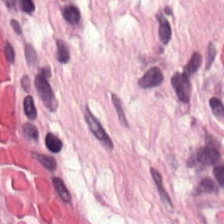

In [9]:
train_non_cancer = wsi.read_region((12597-300,88778-300),0,(224,224))
train_non_cancer.show()

In [13]:
for i in range(128):
    train_non_cancer.save('/cra-1272/ai4cd/train/non-cancer/{}.png'.format(i), 'PNG')

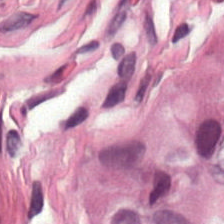

In [14]:
val_cancer = wsi.read_region((13092,87057),0,(224,224))
val_cancer.show()

In [15]:
for i in range(128):
    val_cancer.save('/cra-1272/ai4cd/val/cancer/{}.png'.format(i), 'PNG')

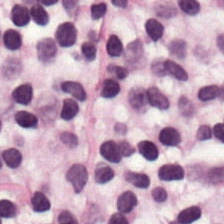

In [16]:
val_non_cancer = wsi.read_region((13092-300,87057-300),0,(224,224))
val_non_cancer.show()

In [17]:
for i in range(128):
    val_non_cancer.save('/cra-1272/ai4cd/train/non-cancer/{}.png'.format(i), 'PNG')

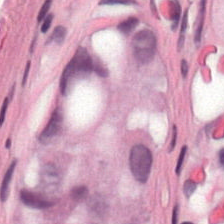

In [18]:
test_cancer = wsi.read_region((10626,75345),0,(224,224))
test_cancer.show()

In [19]:
test_cancer.save('/cra-1272/ai4cd/test/cancer.png', 'PNG')

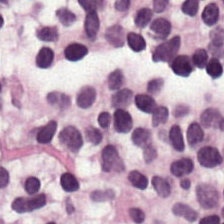

In [21]:
test_non_cancer = wsi.read_region((10626+500,75345+500),0,(224,224))
test_non_cancer.show()

In [22]:
test_non_cancer.save('/cra-1272/ai4cd/test/non-cancer.png', 'PNG')